In [1]:
from sklearn import datasets

# import data
digits = datasets.load_digits()

# target
y = digits.target

# features
X = digits.data

In [2]:
from sklearn import ensemble

# an ensemble of 100 estimators
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [3]:
# how many features do we have in our dataset?
n_features = X.shape[1]

print(n_features)

64


In [4]:
from scipy import stats
import numpy as np
np.random.seed(100)

# we would like to smaple from criterion and max_features as discrete uniform distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=n_features)
}

In [5]:
from sklearn import model_selection

# setting up the random search sampling 50 times and conducting 5-fold cross-validation
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=100)

In [6]:
# start the process
rscv.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [8]:
import pandas as pd

# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)

# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]

# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')

# remove duplicates
distinct_results.drop_duplicates(inplace=True)

# look at the top 5 best hyperparamaterizations
print(distinct_results.sort_values('mean_test_score', ascending=False).head(5))

                                         params  mean_test_score
3     {'criterion': 'gini', 'max_features': 11}         0.940470
48     {'criterion': 'gini', 'max_features': 4}         0.939913
19     {'criterion': 'gini', 'max_features': 5}         0.937700
14     {'criterion': 'gini', 'max_features': 3}         0.937694
21  {'criterion': 'entropy', 'max_features': 8}         0.936582


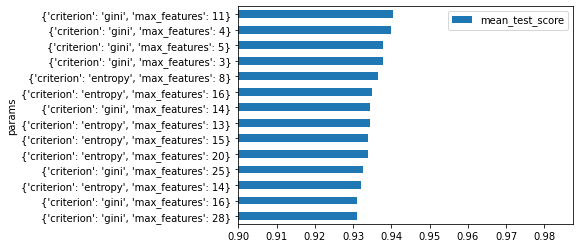

In [9]:
# top performing models
distinct_results[distinct_results.mean_test_score > 0.93].sort_values('mean_test_score').plot.barh(x='params', xlim=(0.9))